# PROFIT VS MKT

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

0

PROFIT ~ MKT

PROFIT_pred = B0 + B1xMKT

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

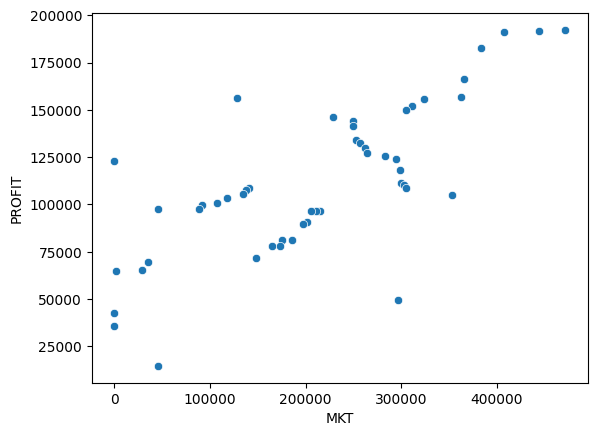

In [6]:
sns.scatterplot(data=df, x='MKT', y='PROFIT')
plt.show()


Seperate X and Y Features

In [7]:
X = df[['MKT']]
Y = df[['PROFIT']]

In [8]:
X.head()

,MKT
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Creating a Linear regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

## Creating a Linear regression Model

In [11]:
model.intercept_

array([60003.54881577])

In [12]:
model.coef_

array([[0.24645926]])

### PROFIT_pred = 49032.899 + 0.8542xMKT


1. If MKT budget is 0 then PROFIT estimated is 60003.5488
2. If MKT budget increases by 1000 the profit increases by 246.45



### Visualize the line to fit


[]

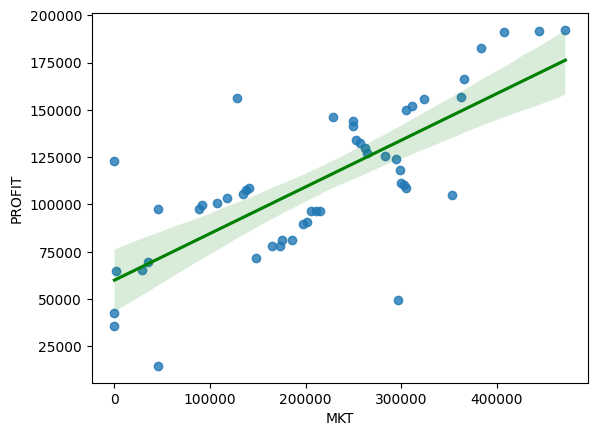

In [13]:
sns.regplot(data=df, x='MKT', y='PROFIT',line_kws={'color':'green'})
plt.plot()

### Estimating profit for out of sample data

In [14]:
X.values

array([[471784.1 ],
       [443898.53],
       [407934.54],
       [383199.62],
       [366168.42],
       [362861.36],
       [127716.82],
       [323876.68],
       [311613.29],
       [304981.62],
       [229160.95],
       [249744.55],
       [249839.44],
       [252664.93],
       [256512.92],
       [261776.23],
       [264346.06],
       [282574.31],
       [294919.57],
       [     0.  ],
       [298664.47],
       [299737.29],
       [303319.26],
       [304768.73],
       [140574.81],
       [137962.62],
       [134050.07],
       [353183.81],
       [118148.2 ],
       [107138.38],
       [ 91131.24],
       [ 88218.23],
       [ 46085.25],
       [214634.81],
       [210797.67],
       [205517.64],
       [201126.82],
       [197029.42],
       [185265.1 ],
       [174999.3 ],
       [172795.67],
       [164470.71],
       [148001.11],
       [ 35534.17],
       [ 28334.72],
       [  1903.93],
       [297114.46],
       [     0.  ],
       [     0.  ],
       [ 45173.06]])

In [16]:
mkt = [[20000]]
profit_pred = model.predict(mkt)
profit_pred

d:\ML\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[64932.73410477]])


## Evaluating the model
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Absolute Error
4. Mean Absolute Percentage Error
5. R2 Score

In [17]:
model.score(X, Y)

0.5591535746115515

In [18]:
# Predict the results for training data
ypred = model.predict(X)
ypred[0:5]

array([[176279.11108087],
       [169406.4540099 ],
       [160542.79548783],
       [154446.6452984 ],
       [150249.14827371]])

In [19]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse

701870011.1971463

In [21]:
rmse = mse**(1/2)
rmse

26492.82942981263

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
mae

21145.71752315582

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.28621259879740946

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.5591535746115515

# PROFIT and MKT have poor Linear Relationship

Reliability of fit is 55.91% hence thice  is a poor model